<a href="https://colab.research.google.com/github/McReader/ml-intro/blob/2_data_exploration/2_data_exploration/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to provide some insights into the general dataset statistics and to explore what variables influenced Titanic's passenger survival 

# Context

In [18]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


There are following variables represented in this dataframe:
* **survival** - Survival, where values are *0 = No, 1 = Yes*
* **pclass** - Ticket class, where values are *1 = 1st, 2 = 2nd, 3 = 3rd*
* **sex** - Sex	
* **Age** - Age in years	
* **sibsp** - # of siblings/spouses aboard the Titanic	
* **parch**	- # of parents/children aboard the Titanic	
* **ticket** - Ticket number	
* **fare** - Passenger fare	
* **cabin** - Cabin number	
* **embarked** - Port of Embarkation, where values are *C = Cherbourg, Q = Queenstown, S = Southampton*




# Data quality assessment

## Nulls and data types

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Data types looks correct, but we need to drop the observations with null values

Let's drop the rows with where the following variables have *null* values:
1.   Age
2.   Ticket
3.   Fare

I don't drop the rows where **Cabin** and **Embarked** columns are *null* intentionally as we don't want to loose the pretty big part of dataset for the exploration. 

In [20]:
titanic_data = train_data.dropna(subset=['Age', 'Ticket', 'Fare'])
pd.isna(titanic_data).sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin          61149
Embarked         238
dtype: int64

For the exploration where these columns matter we'll create a separate dataframe where all the *null*s are dropped

In [116]:
cabins_data = titanic_data.dropna(subset=['Cabin'])
pd.isna(cabins_data).sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked       68
dtype: int64

## Duplicates

Let's count how many items are with the duplicated ticket number and drop them as well

In [21]:
titanic_data = titanic_data.drop_duplicates(subset="Ticket")
len(train_data)-len(titanic_data)

26823

As a result we have the following picture

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73177 entries, 2 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  73177 non-null  int64  
 1   Survived     73177 non-null  int64  
 2   Pclass       73177 non-null  int64  
 3   Name         73177 non-null  object 
 4   Sex          73177 non-null  object 
 5   Age          73177 non-null  float64
 6   SibSp        73177 non-null  int64  
 7   Parch        73177 non-null  int64  
 8   Ticket       73177 non-null  object 
 9   Fare         73177 non-null  float64
 10  Cabin        25080 non-null  object 
 11  Embarked     72995 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.3+ MB


# Data exploration

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

Let's take a look at the distrubution of passengers ages and sex

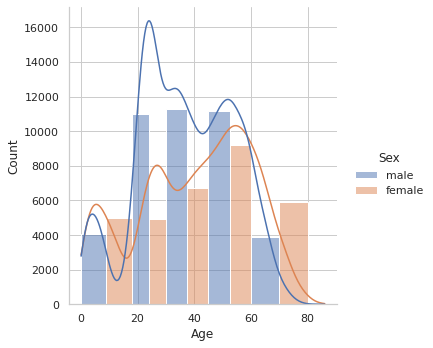

In [48]:
sns.displot(titanic_data, x="Age", hue="Sex", multiple="dodge", kde=True, bins=[0, 18, 30, 45, 60, 80])

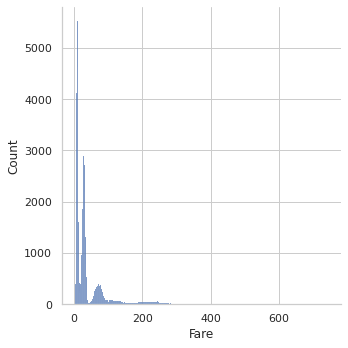

In [104]:
sns.displot(titanic_data, x="Fare")

Let's check the correlation between variables in the dataset

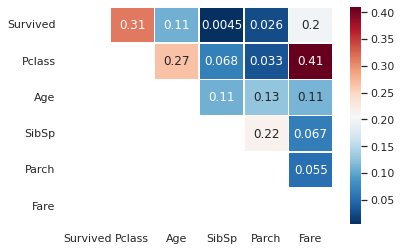

In [93]:
correlation = titanic_data.drop('PassengerId', axis=1).corr(method='pearson').abs()
correlation_without_duplicates = correlation.mask(np.tril(np.ones(correlation.shape)).astype(bool))

sns.heatmap(correlation_without_duplicates, 
            xticklabels=correlation_without_duplicates.columns,
            yticklabels=correlation_without_duplicates.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

There are a couple of obvious correlations in this dataset:
1.   Class and Fare
2.   Sibling/Spouse and Parent/Child

However we can see that there is one more correlation in the heatmap above - Survived and Class

It means that the passengers with tickets to **higher classes had more chances to survive**. Below you may find a line plot with the percentage of survived passenger per class


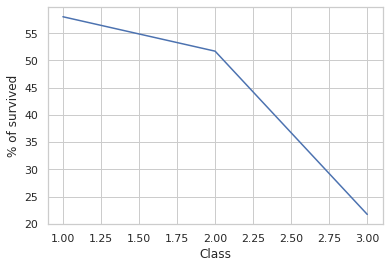

In [92]:
grouped = titanic_data.groupby('Pclass')
count = grouped.count()
sum = grouped.sum()
a = sum['Survived'] / count['Survived'] * 100

p = sns.lineplot(data=a, x=a.index, y=a.values)
p.set_xlabel("Class")
p.set_ylabel("% of survived")
p

In the next chart we see that there was a priority to **save women**. However, it looks like boys had no high chances to survive

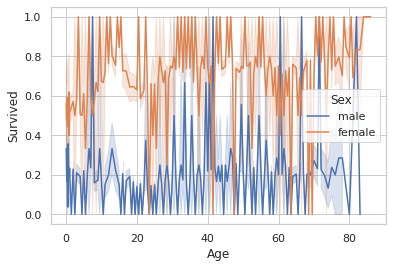

In [111]:
line = sns.lineplot(data=titanic_data, x="Age", y="Survived", hue="Sex")

Now, we're going to explore how Cabin affected passenger's changes to survive. Let's try to find the safest cabins first 

In [130]:
cabins_group = cabins_data.groupby('Cabin')

passengers_per_cabin = cabins_group.count()
passengers_survived_per_cabin = cabins_group.sum()

percentage_of_survived_per_cabin = passengers_survived_per_cabin['Survived'] / passengers_per_cabin['Survived'] * 100

percentage_of_survived_per_cabin.sort_values(ascending=False)

Cabin
C13124    100.0
C10431    100.0
C10393    100.0
C10399    100.0
C10400    100.0
          ...  
B21734      0.0
B21785      0.0
B21801      0.0
B21809      0.0
T9848       0.0
Name: Survived, Length: 21854, dtype: float64

And cabins where all passengers died

In [131]:
percentage_of_survived_per_cabin.sort_values()

Cabin
A10011      0.0
B9130       0.0
B9141       0.0
B9149       0.0
B9154       0.0
          ...  
C14498    100.0
C14501    100.0
C14505    100.0
C14466    100.0
C19236    100.0
Name: Survived, Length: 21854, dtype: float64

From the data we have we see that the **cabins starting from the letter "C" were safer** rather than cabins starting from the letter "A", "B"

# Summary

We achieved the goal of our investigation and discoved the following things:
1.   Passengers with higher class had more chances to survive (1st is the highest)
2.   Women had much more chances to survive rather than men. Probably they had a priority
3.   Children hadn't more chances (especially boys) to survive compared to adults
4.   Cabins starting from the letter "C" were safer rather than cabins starting from the letter "A", "B". Probably, "C" cabins where 1st class cabins, "B" and "C" were for lower classes

